<a href="https://colab.research.google.com/github/kdmid/Class_Python/blob/main/Kaggle/Titanic_Practice_in_Colab_with_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Kaggle 데이터 사용을 위한 사전 세팅

## 1.1. Kaggle API 설치
- `Google Colab`에서 `Kaggle API`를 불러오려면 다음 소스코드를 실행한다. 

In [ ]:
!pip install kaggle

## 1.2. Kaggle Token 다운로드
- Kaggle에서 `API Token`을 다운로드 받는다. 
- [Kaggle]-[My Account]-[API]-[Create New API Token]을 누르면 kaggle.json 파일이 다운로드 된다. 
- 이 파일을 바탕화면에 옮긴 뒤, 아래 코드를 실행 시킨다.




In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# kaggle.json을 아래 폴더로 옮긴 뒤, file을 사용할 수 있도록 권한을 부여한다. 
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
uploaded file "kaggle.json" with length 67 bytes


In [ ]:
ls -1ha ~/.kaggle/kaggle.json

/root/.kaggle/kaggle.json


- 에러 메시지가 없으면 성공적으로 `json` 파일이 업로드 되었다는 뜻이다. 

## 1.3. Kaggle 데이터 불러오기
- 먼저 kaggle competition list를 불러온다.

In [ ]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        134           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        185           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        316           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2365           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      18166            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4561            True  
connectx

- 여기에서 참여하기 원하는 대회의 데이터셋을 불러오면 된다. 
- **!kaggle competitions download -c + 대회명 (위의 목록 중 찾아서 복사 붙여넣기하기)**

In [ ]:
!kaggle competitions download -c titanic

train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

gender_submission.csv  sample_data  test.csv  train.csv


# II. 데이터 확인

## 2.1. EDA에 관한 필수 패키지를 설치

In [ ]:
import pandas as pd #데이터 가공, 변환(dplyr)
import pandas_profiling # 보고서 기능 #아나콘다 할때
import numpy as np #수치연산 & 배열, 행렬
import matplotlib as mpl #시각화
import matplotlib.pyplot as plt #시각화
import seaborn as sns #시각화

from IPython.core.display import display, HTML

## 2.2. 데이터 수집

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print("data import is done")

data import is done


## 2.3. 데이터 확인
- `Kaggle` 데이터를 불러오면 우선 확인해야 하는 것은 데이터셋의 크기다. 
  + 변수의 갯수
  + Numeric 변수 & Categorical 변수의 개수 등을 파악해야 한다.
- Point 1 - `train`데이터에서 굳이 훈련데이터와 테스트 데이터를 구분할 필요는 없다. 
  + 보통 `Kaggle`에서는 테스트 데이터를 주기적으로 업데이트 해준다.
- Point 2 - 보통 `test` 데이터의 변수의 개수가 하나 더 작다. 


In [ ]:
train.shape, test.shape

((891, 12), (418, 11))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- 그 후 `train`데이터의 `상위 5개`의 데이터만 확인한다. 

In [ ]:
display(train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 그 다음 확인해야 하는 것은 `Numerical` 변수와 `Categorical` 변수를 구분한다. 
  + 먼저 `numerical_features`를 구분하자.
  + `include=[np.number]`는 `Numerical` 변수를 알려주고,
  + `exclude=[np.number]`는 `Categorical` 변수를 알려준다.

In [ ]:
numeric_features = train.select_dtypes(include=[np.number]) # 수치형 데이터
print(numeric_features.columns)
print("The total number of numeric features are: ", len(numeric_features.columns))

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
The total number of numeric features are:  7


- `numeric_features`을 제외한 나머지 변수를 추출하자.

In [ ]:
categorical_features = train.select_dtypes(exclude=[np.number])
print(categorical_features.columns)
print("The total number of numeric features are: ", len(categorical_features.columns))

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
The total number of numeric features are:  5


# III. 데이터 따라하기
- https://www.kaggle.com/ash316/eda-to-prediction-dietanic

## 3.1. 데이터 탐색 EDA(Exploratory Data Analysis)

- 필요한 패키지 설치

In [ ]:
import numpy as np #수치연산 & 배열, 행렬
import pandas as pd #데이터 가공, 변환(dplyr)
import matplotlib.pyplot as plt #시각화
import seaborn as sns #시각화
plt.style.use('fivethirtyeight') #시각화 스타일 설정
import warnings # 경고 메세지 무시
warnings.filterwarnings('ignore')
%matplotlib inline

- 데이터 확인

In [ ]:
data=pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.isnull().sum() #결측값 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Age, Cabin, Embarked에 결측값이 존재한다.
- 이 값을 수정할 필요가 있다.

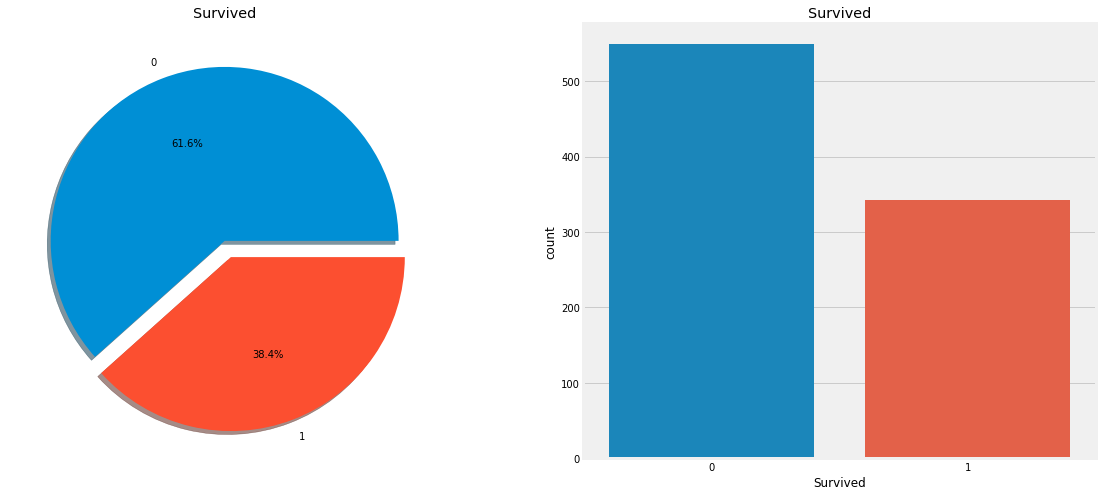

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived') #왼쪽 그래프 제목 넣기
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived') #오른쪽 그래프 제목 넣기
plt.show()

- 전체 인원 중 38.4%만 살아남았다.
- 데이터로부터 더 나은 통찰력을 얻고 어떤 범주의 승객들이 살아남았는지 그리고 누가 살아남지 않았는지 보기 위해 더 많은 정보를 분석해야한다.

## 3.2.Types Of Features

- 범주형 피쳐(Categorical Features):  
    - 범주형 변수는 두 개 이상의 범주를 가진 변수이다.
    - 해당 형상의 각 값은 범주별로 분류할 수 있다. 
    - 이러한 변수들에 대해 어떠한 순서도 정렬할 수 없다.
    - 데이터: Sex(남성과 여성), Embarked(S, C)

- 순서형 피쳐(Ordinal Features):
    - 순서형 변수는 범주형 값과 비슷하지만, 그 값들 사이의 차이는 우리가 상대적인 순서나 값들 사이의 정렬을 가질 수 있다는 것이다.
    - 예를 들어 높이에 높은 값, 중간 값, 짧은 값과 같은 특징이 있다면 높이는 순서형 변수다.
    - 데이터: PClass

- 연속형 피쳐(Continous Feature):
    - 피쳐 열의 두 점 또는 최소값 또는 최대값 사이에 값이 연속되는 경우
    - 데이터: Age

## 3.3. Analysing The Features


### Sex--> Categorical Feature

In [ ]:
data.groupby(['Sex','Survived'])['Survived'].count() #데이터 요약

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

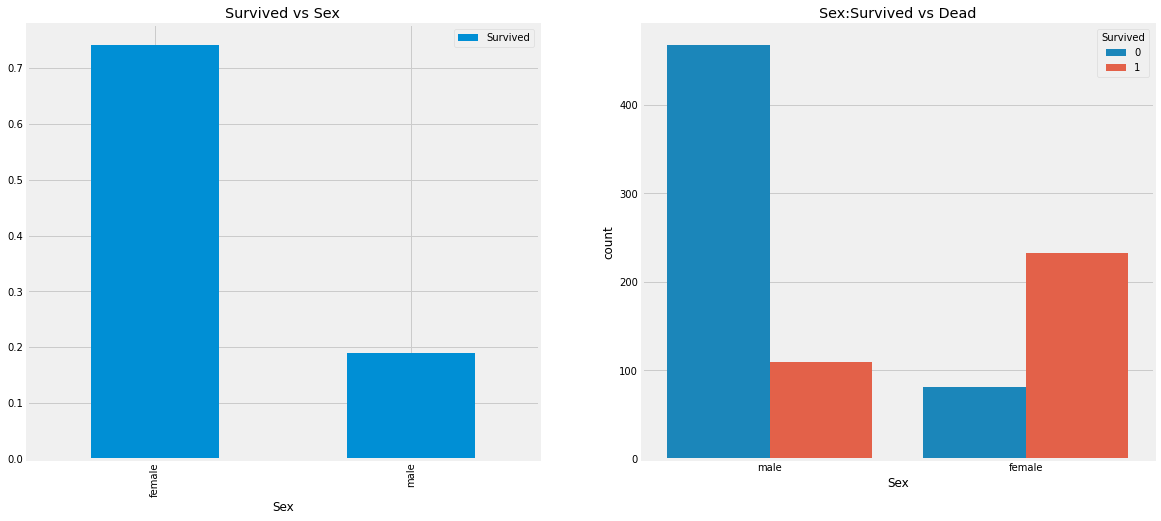

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0]) #성별 생존자 비율
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1]) #성별 생존자, 사망자 수
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

- 배에 타고 있는 남자들의 수가 여자들의 수보다 훨씬 많다.
- 그러나 구조된 여성의 수는 구조된 남성의 수보다 거의 두 배나 많다.
- 배에 타고 있는 여성의 생존율은 약 75%인 반면 남성은 약 18-19%이다.

In [ ]:
### Pclass --> Ordinal Feature

In [ ]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r') #좌석 등급별 생존자 수 분류

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


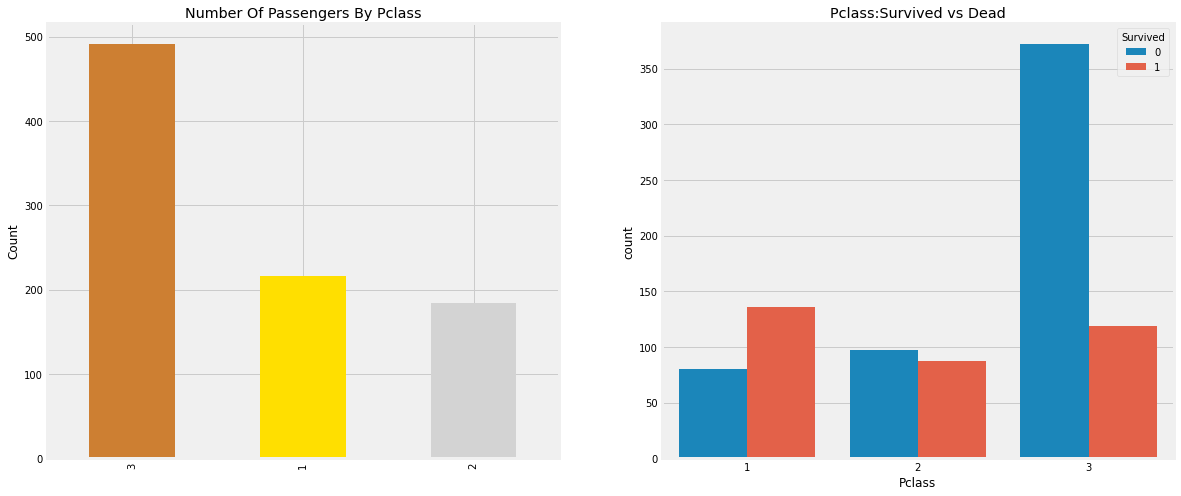

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0]) #좌석 등급별 승객 수
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1]) #좌석 등급별 생존자, 사망자 수
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

- PClass 1의 승객이 구조 당시 높은 우선순위를 부여받았다는 것을 분명히 알 수 있다.
- PClass 3의 탑승객 수가 훨씬 더 많았지만, 여전히 탑승객들로부터 생존하는 사람들의 수는 약 25%로 매우 낮다.
- Pclass1의 생존율이 약 63%인 반면 Pclass2의 경우 약 48%이다.

- Sex와 Pclass의 데이터를 합쳐 생존율을 확인해보자.

In [ ]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r') #성별 좌석 등급별 생존자 수 분류
#margins은 합계표시여부

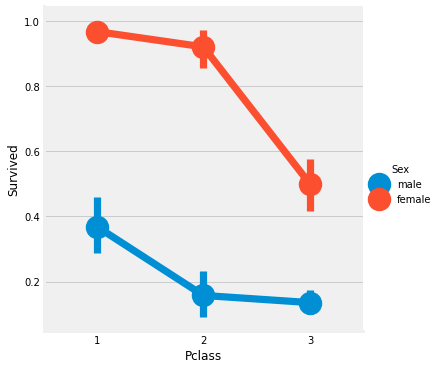

In [ ]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data) #성별 좌석 등급별 생존률 시각화
plt.show()

- 범주형 값을 쉽게 분리하기 위해 FactorPlot을 사용하였다.
- CrossTab과 FactorPlot을 보면 여성 94명 중 3명만이 사망했기 때문에 Pclass1 여성 생존율이 약 95~96%라고 쉽게 유추할 수 있다.
- Pclass와 관계 없이 구조하는 동안 여성에게 구조우선권이 주어졌다는 것은 명백하다.
- Pclass1 출신의 남성들의 생존율 또한 매우 낮다.

### Age--> Continous Feature

In [ ]:
print('Oldest Passenger was of:',data['Age'].max(),'Years') #나이 최대값 표시
print('Youngest Passenger was of:',data['Age'].min(),'Years') #나이 최솟값 표시
print('Average Age on the ship:',data['Age'].mean(),'Years') #평균 나이 표시

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


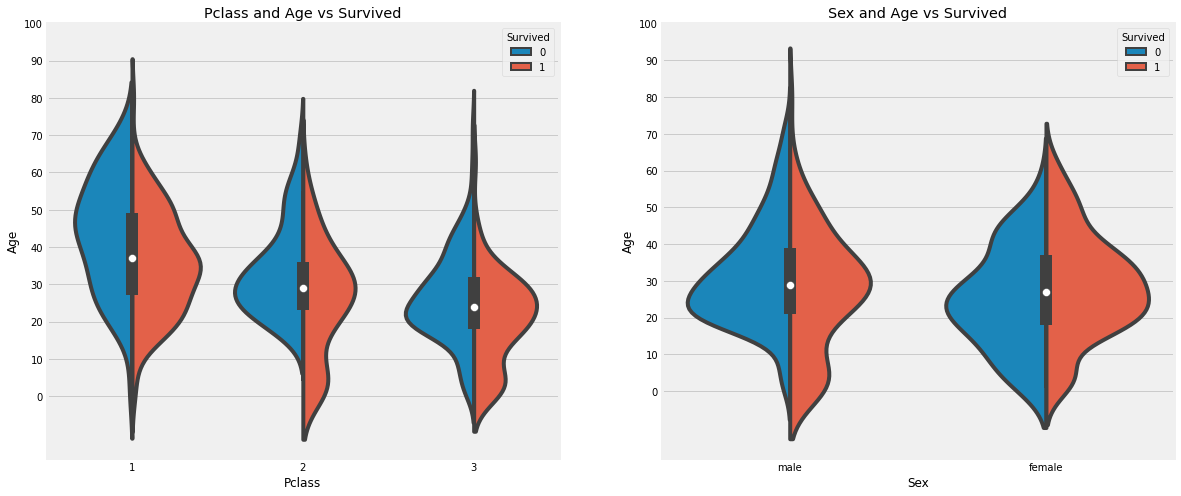

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0]) #나이별 좌석등급별 생존자 수 비교 (x축, y축, 범례)
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1]) #나이별 성별 생존자 수 비교 (x축, y축, 범례)
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

- Pclass가 증가함에 따라 어린 승객의 수가 증가한다.
- 10세 미만 승객의 생존율은 Pclass에 관계없이 양호한 편이다.
- Pclass1에서 20-50세의 생존률은 높고 여성은 특히 더 높다.
- 남성의 경우 나이 많을수록 생존률이 줄어든다.

- Age 카테고리의 결측값은 177개이다.
- 이러한 결측값을 대체하기 위해 데이터 집합의 평균 연령을 할당할 수 있다.
- 하지만 우리는 너무 다른 나이에(예를 들어 4살) 평균값(29세)를 대입할 수는 없다.
- 우리는 이름에 Mr. 와 Mrs.를 통해 성별을 예측하고 각 그룹에 맞는 평균을 대입할 수 있다.

In [ ]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

- Regex를 사용하자. [A-Za-z]+).
- A-Z 또는 a-z 사이에 있는 문자열을 찾고, 그 뒤에 .(점)이 있는 문자열을 찾는다.
- 그러면 이름에서 이니셜을 성공적으로 추출할 수 있다.

In [ ]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


- Mlle나 Mme 같이 Miss를 나타내는데 철자가 틀린 단어들을 수정할 필요가 있다.

In [ ]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

- Age의 결측값을 채워보자

In [ ]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

data.Age.isnull().any() #So no null values left finally 

False

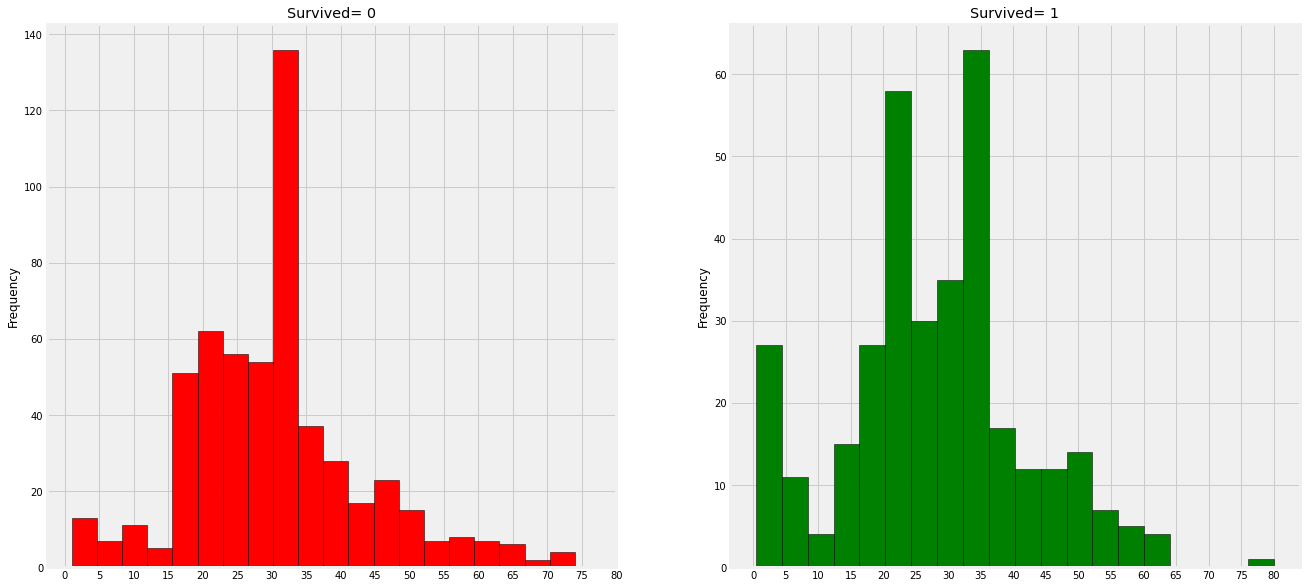

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

- 5세 미만의 아이들이 많이 생존한 것을 확인할 수 있다.
- 나이가 가장 많은 80세 승객은 생존한 것을 확인할 수 있다.
- 30-40 연령의 승객들의 사망자 수가 가장 큰 것을 확인할 수 있다.

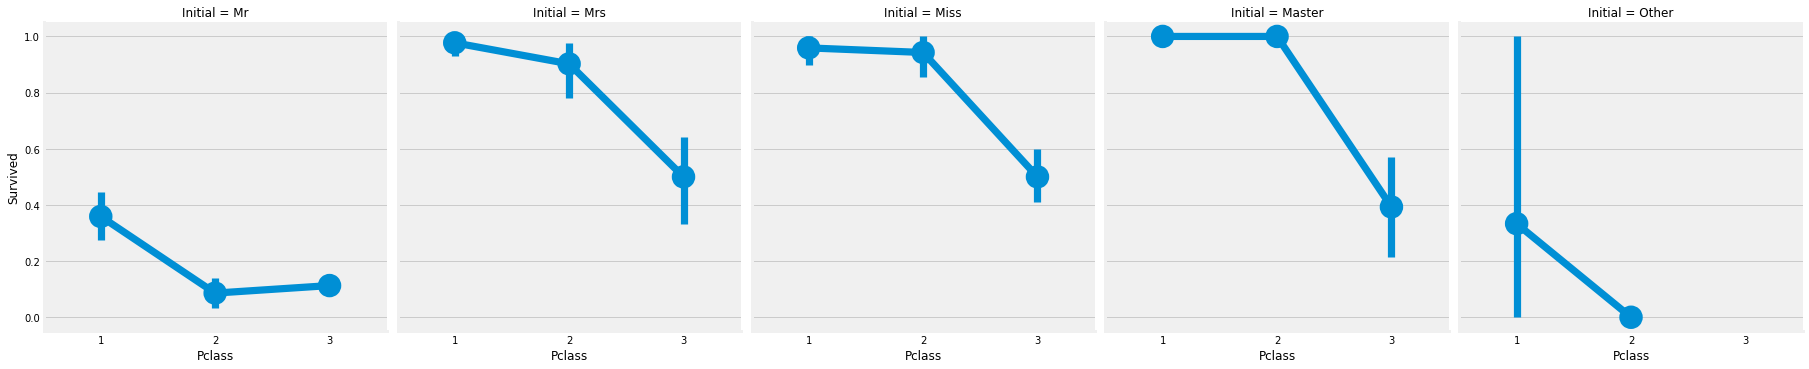

In [ ]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

- 모든 연령층에서 여성과 아동이 우선적으로 구조되었다는 것을 확인할 수 있다.

### Embarked--> Categorical Value

- Embarked: 탑승 항구
    - C = Cherbourg
    - Q = Queenstown
    - S = Southampton

In [ ]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

- 항구별 생존률

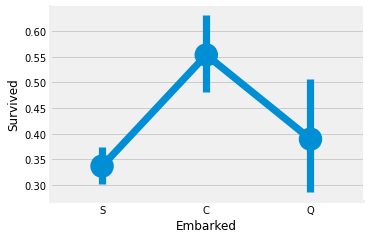

In [ ]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

- 항구 C에서 생존률이 0.55로 가장 높고, 항구 S에서 가장 낮다.

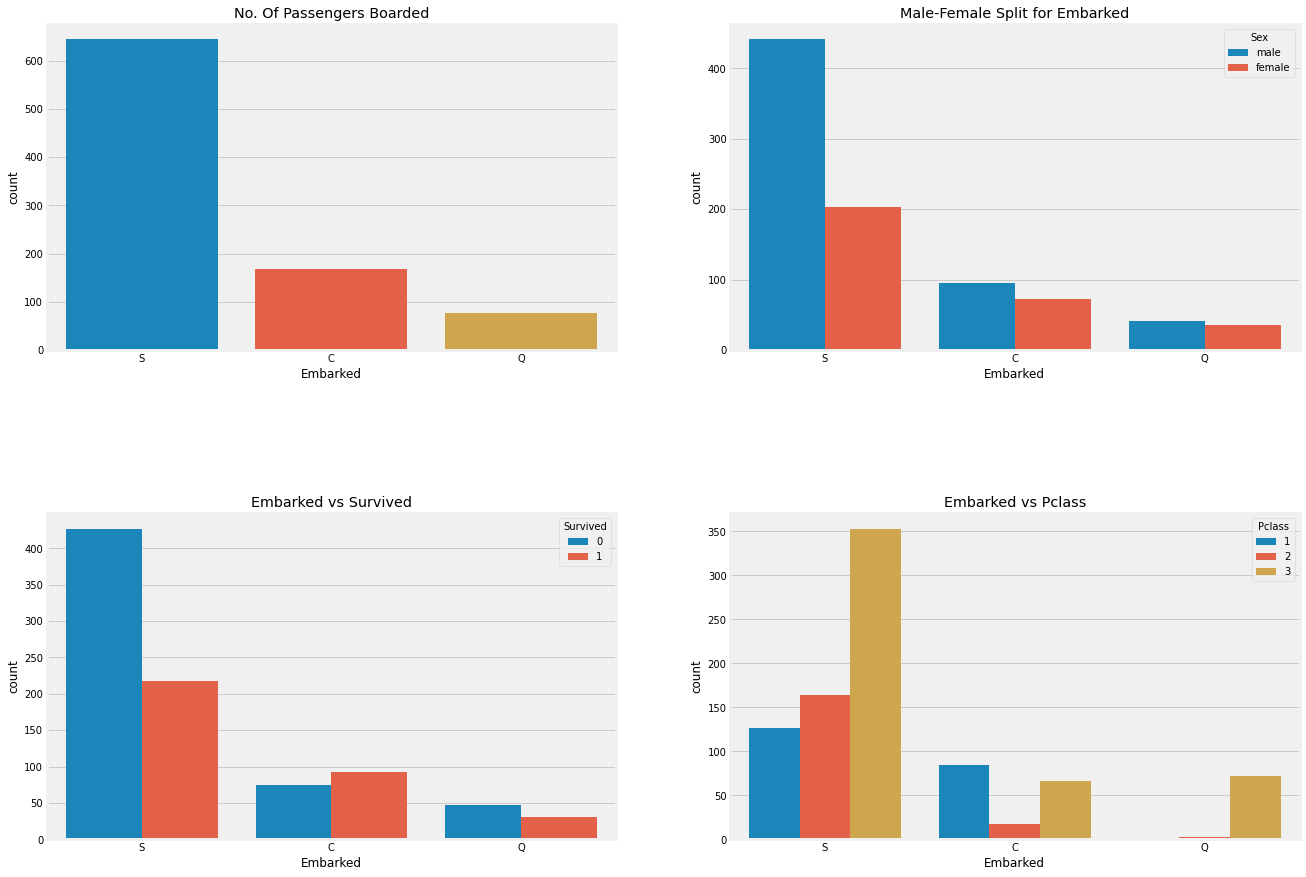

In [ ]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0]) #항구별 승객 수
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1]) #항구별 성별 승객 수
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0]) #항구별 생존자, 사망자 수
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1]) #항구별 등급별 승객 수
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

- 승객이 가장 많이 탄 항구는 S이며, Pclass3 의 승객이 많은 비중을 차지한다.
- 항구 C에서 승선한 승객들의 생존률이 높다. 그 이유는 Pclass1과 2 등급의 비중이 높아 구조가 잘 이루어진 것으로 보인다.
- 항구 S의 생존률이 낮은 이유는 Pclass3의 승객들이 많기 때문으로 보여진다. Pclass3의 승객들은 약 81% 정도가 생존하지 못하였다.
- 항구 Q에서 승선한 승객들의 약 95%는 Pclass3 등급의 승객들이다.

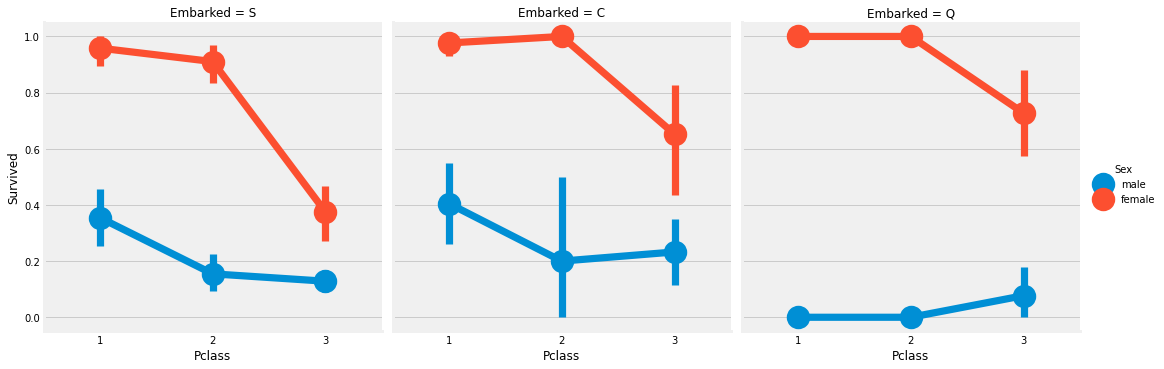

In [ ]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

- Pclass1 과 Pclass2 여성들의 생존률은 거의 1에 가깝다.
- 항구 S의 승객들은 남녀 모두 생존률이 매우 낮다.
- 항구 Q의 남자 승객들은 Pclass 상관없이 생존률이 매우 낮다.

- Embarked의 결측값(NaN) 채우기
    - 항구 S의 승객들이 가장 많으므로 결측값(NaN)을 S로 대체하도록 하자.

In [ ]:
data['Embarked'].fillna('S',inplace=True)
data.Embarked.isnull().any()# Finally No NaN values

False

### SibSp--> Discrete Feature

- 이 항목은 승객들이 혼자인지 가족과 함께 승선했는지를 나타낸다.(일행이 있는지를 나타냄)
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife

In [ ]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


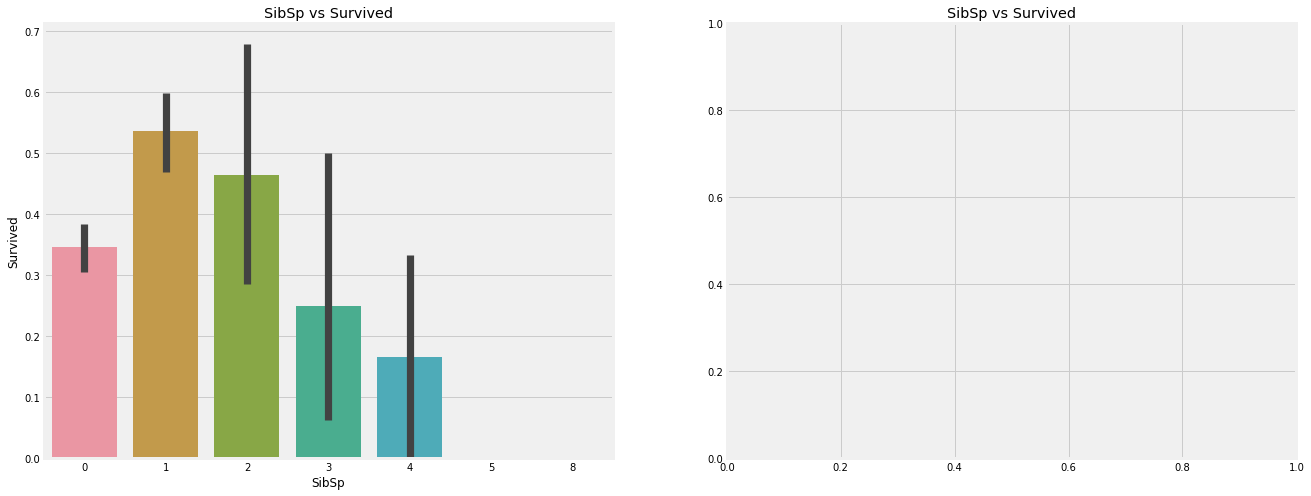

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [ ]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


-  barplot 과 factorplot을 통해 혼자 탑승한 승객의 생존률이 34.5%라는 것을 알 수 있다.
- 동행자 수가 증가할수록 생존률이 감소한다.
- 5~8인의 가족 생존률은 0인데 Pclass3 등급의 고객이기 때문일 수도 있다.

### Parch

In [ ]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


위 crosstab은 Pclass3에 다인 가족이 있음을 보여준다.

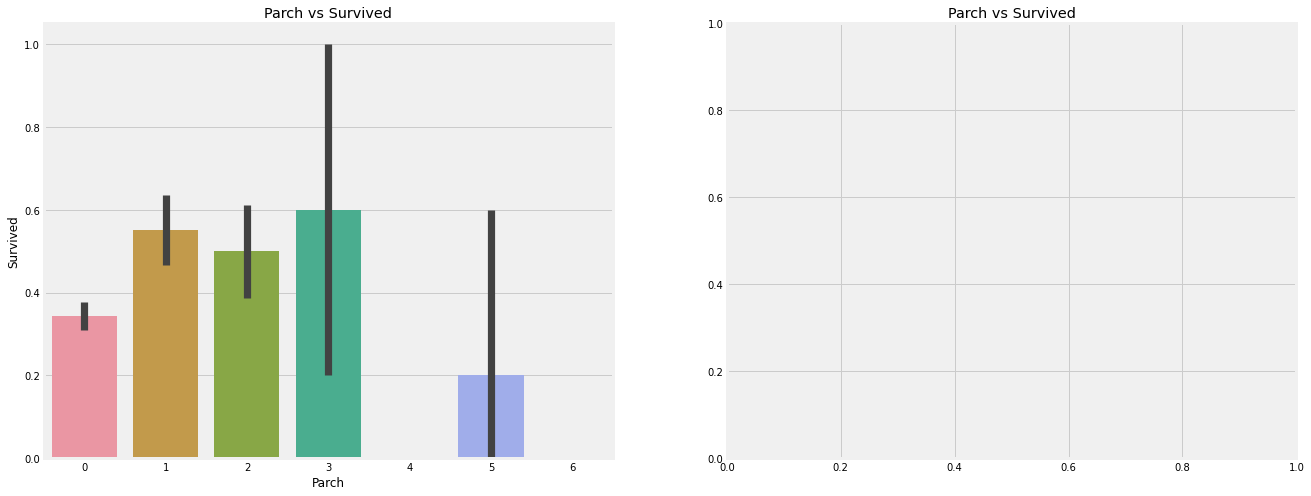

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

- 부모를 동반한 승객들의 생존률이 높은 것을 확인할 수 있다.
- 하지만 동반 승객 숫자가 늘어날수록 생존률이 줄어든다.
- 1-3명의 동반 승객이 있는 경우 생존률이 높으며
- 혼자이거나 4명 이상인 경우 생존률이 낮다.

### Fare--> Continous Feature

In [ ]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


요금을 보면 공짜로 탄 사람이 있는 것을 확인할 수 있다.

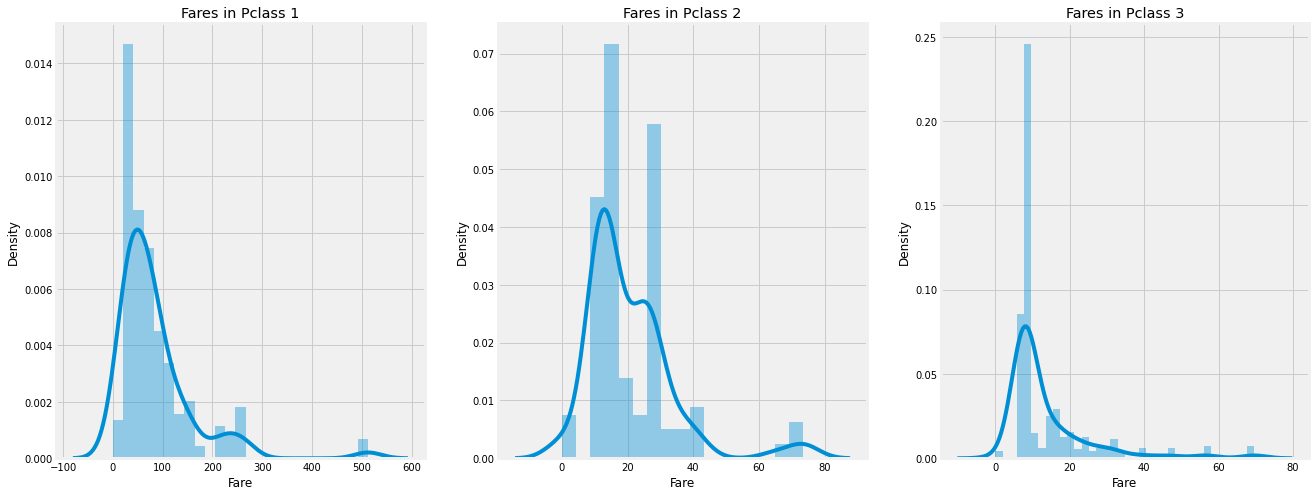

In [ ]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

- Pclass1의 fare에서 분포가 크며, 점차 감소한다.
- 연속된 값이기 때문에 bining을 사용하여 값을 변환할 수 있다.

### Observations in a Nutshell for all features
- Sex: 남성에 비해 여성의 생존률이 높다.
- Pclass: Pclass1의 생존률이 높으며, 반면에, Pclass3의 생존율은 매우 낮다. 여성의 경우 Pclass1에서 생존률은 거의 1이며 Pclass2에서의 생존률 또한 높다.
- Age: 5~10세 미만의 어린이들은 생존률이 높다. 15세에서 35세 사이의 승객들이 많이 죽었다.
- Embarked: Pclass1 승객의 대다수가 S에서 승선했음에도 불구하고, C에서 생존률이 더 높다. Q에서 승선한 승객들은 대부분 Pclass3 등급의 승객이다.
- Parch+SibSp: 형제자매 혹은 배우자가 있는 1-2명, 부모님이 같이 있는 1-3명에서의 생존률이 혼자 이거나, 대가족이 있는 사람의 생존률보다 더 높다.

### Correlation Between The Features

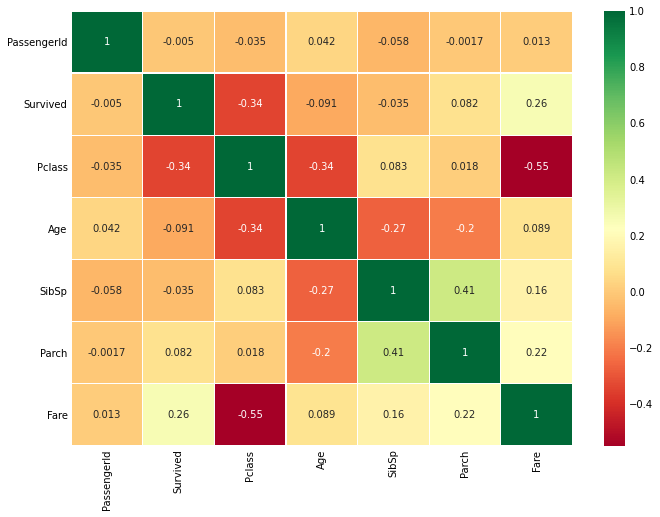

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

## 3.4. Part2: Feature Engineering and Data Cleaning
- 불필요한 feature(중복자료) 제거

### Age_band
- Age Feature의 문제점
    - Age는 연속적인 값이고, 머신러닝에 있어 연속적인 값에 관한 문제가 있다.
    - Bining과 Nomalization을 통해 연속형 값을 범주형 값으로 변환해 줄 필요가 있다.
    - binning을 사용하여 다양한 연령대를 하나의 bin으로 그룹화하거나 단일 값을 할당할 것이다.
    - 0-80의 범위를 5개의 그룹으로 나눌 것이다.(16 크기의 5개 그룹)

In [ ]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [ ]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,Age_band
1,382
2,325
0,104
3,69
4,11


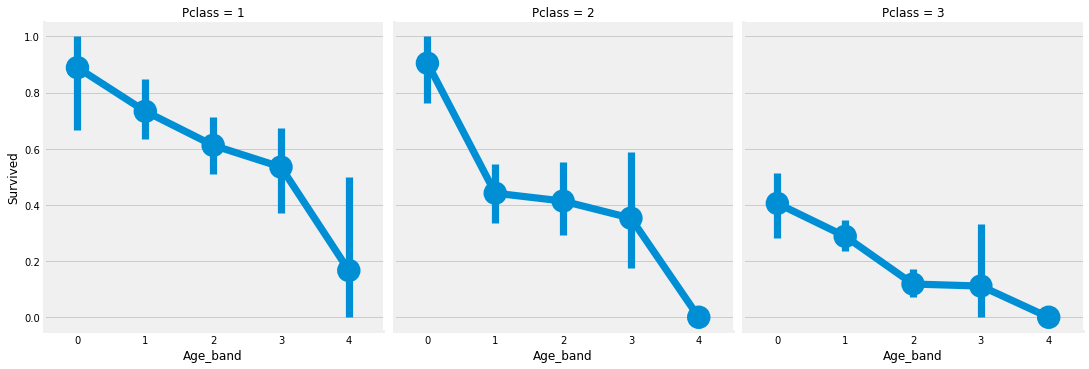

In [ ]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

- Pclass에 상관없이 나이가 많을수록 생존률이 떨어진다.

### Family_Size and Alone
-  Parch 와 SibSp Feature의 합을 통해 "Family_size"와 "Alone"이라는 Feature를 생성할 것이다.
- 이는 승객의 가족 규모와 생존률이 상관관계가 있는지 확인하기 위함이다.
- Alone은 승객이 혼자인지 아닌지를 나타낸다.

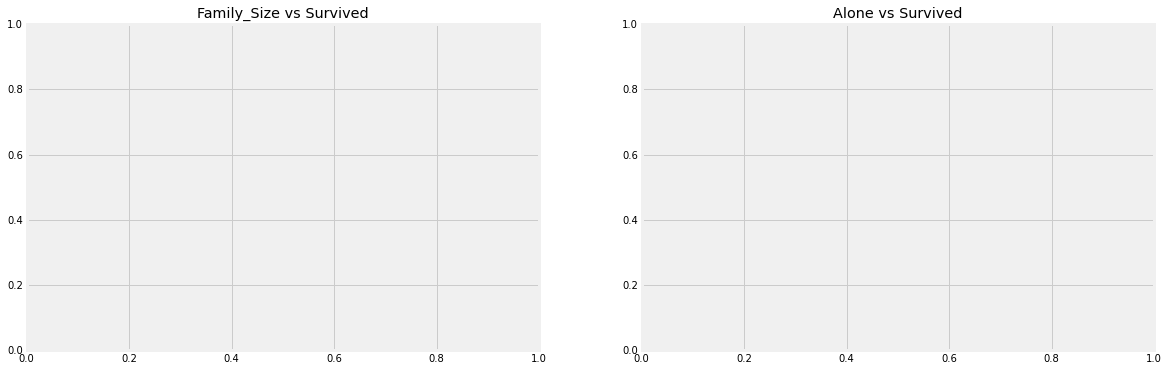

In [ ]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

- Family_Size=0은 승객이 혼자인 것을 의미한다.
- 혼자 승선한 승객의 경우 생존률이 매우 낮다.
- Family size > 4인 경우 또한 생존률이 감소한다.

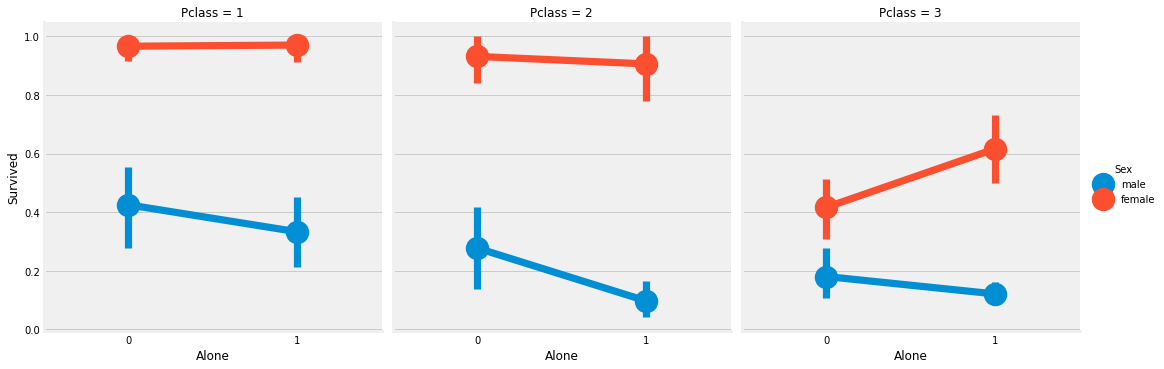

In [ ]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

- Sex와 Pclass와 무관하게 혼자인 승객의 생존률은 좋지 않다.
- 예외적으로 Pclass3의 여성의 경우, 혼자인 경우가 가족이 있는 경우보다 생존률이 높다. 

### Fare_Range

- Fare 또한 연속형 값을 갖기 때문에 서수 값으로 변환해 주어야 한다.
- pandas.qcut를 사용하여 변환할 것이다.
- qcut은 우리가 통과시킨 bin의 개수에 따라 분류할 것이다.

In [ ]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


- Fare_Range가 증가할수록 생존률 또한 증가하는 것을 확인할 수 있다.
- Fare_Range 값을 그대로 사용할 수 없으므로, singleton값으로 변환해 주어야 한다.

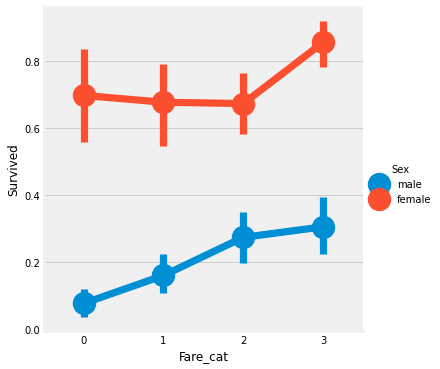

In [ ]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

- Fare_cat이 증가할수록 생존률이 증가한다.

### Converting String Values into Numeric
- 머신러닝에 문자열 데이터를 사용할 수 없으므로, Sex, Embarked 등의 데이터를 숫자형 데이터로 변환해야 한다.

In [ ]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

- 불필요한 Feature 삭제
    - Name--> 범주형 값으로 변환할 수 없으므로 삭제한다.
    - Age--> Age_band feature를 사용할 것이므로 삭제한다.
    - Ticket--> It is any random string that cannot be categorised.
    - Fare--> Fare_cat을 사용할 것이므로 삭제한다. 
    - Cabin--> 결측값이 많고, 대부분의 승객들이 복수의 객실을 가지고 있으므로 필요없는 데이터이다.
    - Fare_Range--> Fare_cat을 사용할 것이므로 삭제한다.
    - PassengerId--> 분류할 수 없다.

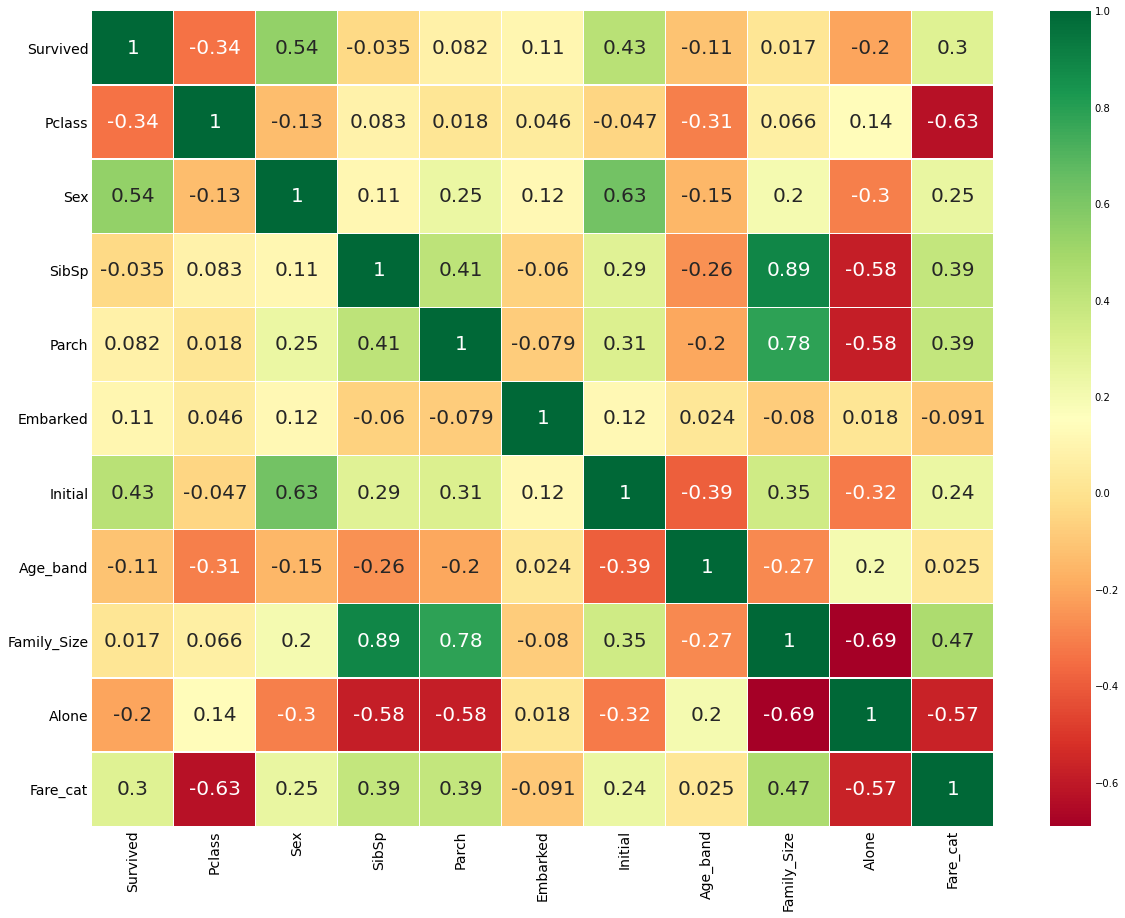

In [ ]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- 우리는 Feature간의 연관성을 확인할 수 있다.
- SibSp and Family_Size와 Parch and Family_Size처럼 양의 값이거나 Alone과 Family_Size와 같이 음의 값이다.

## 3.5. Part3: Predictive Modeling